In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, Column, Integer, String
from dateutil.relativedelta import relativedelta

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurementr = Base.classes.measurement
Stationr = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:

#Own work here to find columns in measurement table
# get the metadata for the table that the Measurement class represents


# access the metadata for the measurement table
metadata = Measurementr.__table__.metadata

# get the columns for the table
columns = metadata.tables['measurement'].columns

# get the names of the columns
column_names = [c.name for c in columns]

# print the column names
print(column_names)


['id', 'station', 'date', 'prcp', 'tobs']


In [10]:
# Find the most recent date in the data set.
# construct the query to retrieve the maximum date
max_date_query = session.query(func.max(Measurementr.date))

# execute the query and retrieve the result
max_date = max_date_query.scalar()

# print the maximum date
print(max_date)
# we can also use
# session.query(Measurementr.date).order_by(Measurementr.date.desc()).first()

2017-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
max_date_query = session.query(func.max(Measurementr.date)).scalar()
max_date = datetime.strptime(max_date_query, '%Y-%m-%d').date()

# query to get the data within the date range
query = session.query(Measurementr.date, Measurementr.prcp).filter(Measurementr.date >= max_date - timedelta(days=365))

#print(max_date_query)
print(max_date)

# execute the query and convert the results to a dataframe
df = pd.read_sql_query(query.statement, session.bind)

# convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

num_rows = len(df)
print(num_rows)





2017-08-23
2230


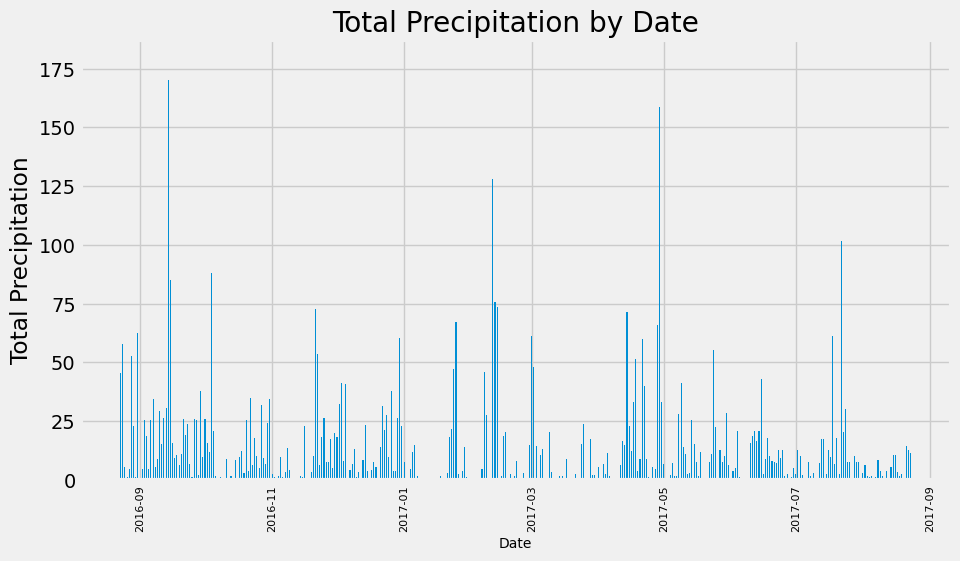

In [12]:

# Use Pandas Plotting with Matplotlib to plot the data
max_prcp = df['prcp'].max()

fig, ax = plt.subplots(figsize=(10, 5))
#ax.bar(precip_by_date['date'], precip_by_date['prcp'], width=0.5)
ax.bar(df['date'], df['prcp'], width=0.5)
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Total Precipitation')
ax.set_title('Total Precipitation by Date')
ax.tick_params(axis='x', labelrotation=90, labelsize=8)
ax.set_ylim(0, max_prcp*1.1)
plt.subplots_adjust(bottom=0)
plt.show()




In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(df.describe())

              prcp
count  2021.000000
mean      4.505888
std      11.713487
min       0.000000
25%       0.000000
50%       0.500000
75%       3.300000
max     170.200000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
# as we are not asked for active stations, I am querying the Station table
metadata = Stationr.__table__.metadata

# get the columns for the table
columns = metadata.tables['station'].columns

# get the names of the columns
column_names = [c.name for c in columns]

# print the column names
print(column_names)

num_stations = session.query(func.count(Stationr.station.distinct())).scalar()
print("Number of stations :", num_stations)


['id', 'station', 'name', 'latitude', 'longitude', 'elevation']
Number of stations : 9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
results = session.query(Measurementr.station, func.count(Measurementr.station)).\
    group_by(Measurementr.station).\
    order_by(func.count(Measurementr.station).desc()).\
    all()

station_with_max_row_count = results[0][0]
max_row_count = results[0][1]

print(f"Station with maximum row count: {station_with_max_row_count}, Max row count: {max_row_count}")
print(f"Here is the comprehensive ordered list")
for result in results:
    station_name = result[0]
    row_count = result[1]
    print(f"Station: {station_name}, Row count: {row_count}")




Station with maximum row count: USC00519281, Max row count: 2772
Here is the comprehensive ordered list
Station: USC00519281, Row count: 2772
Station: USC00519397, Row count: 2724
Station: USC00513117, Row count: 2709
Station: USC00519523, Row count: 2669
Station: USC00516128, Row count: 2612
Station: USC00514830, Row count: 2202
Station: USC00511918, Row count: 1979
Station: USC00517948, Row count: 1372
Station: USC00518838, Row count: 511


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp_active = session.query(func.min(Measurementr.tobs)).filter(Measurementr.station == 'USC00519281').scalar()
max_temp_active = session.query(func.max(Measurementr.tobs)).filter(Measurementr.station == 'USC00519281').scalar()
avg_temp_active = session.query(func.avg(Measurementr.tobs)).filter(Measurementr.station == 'USC00519281').scalar()

print(f"lowest temperature of most active station USC00519281 = {min_temp_active}")
print(f"highest temperature of most active station USC00519281 = {max_temp_active}")
print(f"average temperature of most active station USC00519281 = {avg_temp_active}")


#max_row_count_station = df[df['station'] == station_with_max_row_count]
#print(max_row_count_station)  # Add this line to check if the DataFrame includes the expected rows
#min_tobs = max_row_count_station['tobs'].min()
#max_tobs = max_row_count_station['tobs'].max()
#mean_tobs = max_row_count_station['tobs'].mean()

#print(f"Number of NaN values in the 'tobs' column: {max_row_count_station['tobs'].isna().sum()}")
#print(f"The minimum temperature observed at station {station_with_max_row_count} is {min_tobs}")
#print(f"The maximum temperature observed at station {station_with_max_row_count} is {max_tobs}")
#print(f"The mean temperature observed at station {station_with_max_row_count} is {mean_tobs:.4f}")


lowest temperature of most active station USC00519281 = 12.2
highest temperature of most active station USC00519281 = 29.4
average temperature of most active station USC00519281 = 22.03582251082252


In [19]:
mostactive_max_date = session.query(func.max(Measurementr.date)).\
                filter(Measurementr.station == 'USC00519281').scalar()

# convert string to datetime object
mostactive_max_date = datetime.strptime(mostactive_max_date, '%Y-%m-%d')
print(f"stations max date ",mostactive_max_date)
# query to get the data within the date range
query = session.query(Measurementr.date, Measurementr.tobs).\
            filter(Measurementr.date >= mostactive_max_date - timedelta(days=365)).\
            filter(Measurementr.station == 'USC00519281')

# execute the query and convert the results to a dataframe
df2 = pd.read_sql_query(query.statement, session.bind)

# print the dataframe
df2.tail()



stations max date  2017-08-18 00:00:00


,date,tobs
351,2017-08-14,25.0
352,2017-08-15,25.0
353,2017-08-16,24.4
354,2017-08-17,24.4
355,2017-08-18,26.1


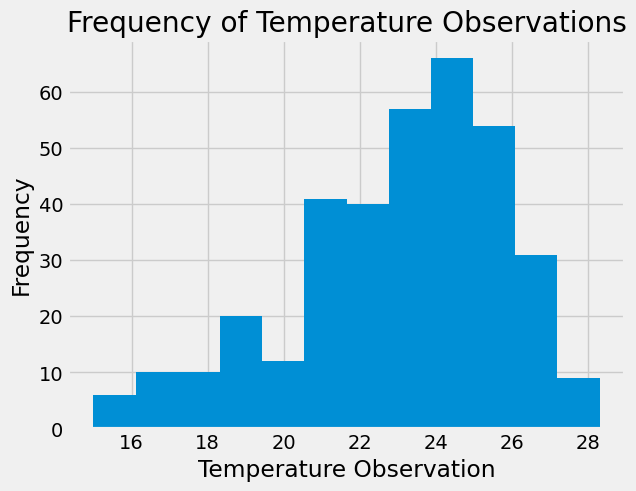

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

n_bins = 12
df2['tobs'].plot.hist(ax=ax, bins=n_bins)

ax.set_xlabel('Temperature Observation')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Temperature Observations')
plt.show()



# Close Session

In [ ]:
# Close Session
session.close()